# Project

# Final Project - Analyzing Sales Data

**Date**: 18 January 2023

**Author**: Supawit Srisupap

**Course**: `Pandas Foundation`

In [2]:
# import data
import pandas as pd
import numpy as np
df = pd.read_csv("sample-store.csv")

In [3]:
# preview top 5 rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,11/8/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2019-152156,11/8/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2019-138688,6/12/2019,6/16/2019,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2018-108966,10/11/2018,10/18/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2018-108966,10/11/2018,10/18/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
# shape of dataframe
df.shape

(9994, 21)

In [5]:
# see data frame information using .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   object 
 6   Customer Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   Country/Region  9994 non-null   object 
 9   City            9994 non-null   object 
 10  State           9994 non-null   object 
 11  Postal Code     9983 non-null   float64
 12  Region          9994 non-null   object 
 13  Product ID      9994 non-null   object 
 14  Category        9994 non-null   object 
 15  Sub-Category    9994 non-null   object 
 16  Product Name    9994 non-null   object 
 17  Sales           9994 non-null   f

We can use `pd.to_datetime()` function to convert columns 'Order Date' and 'Ship Date' to datetime.

In [6]:
# example of pd.to_datetime() function
pd.to_datetime(df['Order Date'].head(), format='%m/%d/%Y')

0 2019-11-08
1 2019-11-08
2 2019-06-12
3 2018-10-11
4 2018-10-11
Name: Order Date, dtype: datetime64[ns]

In [7]:
# TODO - convert order date and ship date to datetime in the original dataframe
df['Order date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')
df['Order date']

0 2019-11-08
1 2019-11-08
2 2019-06-12
3 2018-10-11
4 2018-10-11
 ... 
9989 2017-01-21
9990 2020-02-26
9991 2020-02-26
9992 2020-02-26
9993 2020-05-04
Name: Order date, Length: 9994, dtype: datetime64[ns]

In [8]:
# TODO - count nan in postal code column
df['Postal Code'].isna().sum()

11

In [9]:
# TODO - filter rows with missing values
df[df.isna().any(axis=1)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order date,Ship date
2234,2235,CA-2020-104066,12/5/2020,12/10/2020,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,...,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,7,0.0,67.6599,2020-12-05,2020-12-10
5274,5275,CA-2018-162887,11/7/2018,11/9/2018,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,...,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,3,0.0,178.8000,2018-11-07,2018-11-09
8798,8799,US-2019-150140,4/6/2019,4/10/2019,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,...,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,5,0.0,336.6350,2019-04-06,2019-04-10
9146,9147,US-2019-165505,1/23/2019,1/27/2019,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,2,0.0,42.9914,2019-01-23,2019-01-27
9147,9148,US-2019-165505,1/23/2019,1/27/2019,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,6,0.0,2.7336,2019-01-23,2019-01-27
9148,9149,US-2019-165505,1/23/2019,1/27/2019,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29,13,0.0,406.7154,2019-01-23,2019-01-27
9386,9387,US-2020-127292,1/19/2020,1/23/2020,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92,4,0.0,37.5624,2020-01-19,2020-01-23
9387,9388,US-2020-127292,1/19/2020,1/23/2020,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28,1,0.0,5.7716,2020-01-19,2020-01-23
9388,9389,US-2020-127292,1/19/2020,1/23/2020,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94,3,0.0,152.0232,2020-01-19,2020-01-23
9389,9390,US-2020-127292,1/19/2020,1/23/2020,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04,1,0.0,0.9588,2020-01-19,2020-01-23


In [10]:
# TODO - Explore this dataset on your owns, ask your own questions
# Which state has the most profit? top 5
df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(5)

State
California 76381.3871
New York 74038.5486
Washington 33402.6517
Michigan 24463.1876
Virginia 18597.9504
Name: Profit, dtype: float64

## Data Analysis Part

Answer 10 below questions to get credit from this course. Write `pandas` code to find answers.

In [11]:
# TODO 01 - how many columns, rows in this dataset
df.shape

(9994, 23)

In [12]:
# TODO 02 - is there any missing values?, if there is, which colunm? how many nan values?
df.isna().sum()

Row ID 0
Order ID 0
Order Date 0
Ship Date 0
Ship Mode 0
Customer ID 0
Customer Name 0
Segment 0
Country/Region 0
City 0
State 0
Postal Code 11
Region 0
Product ID 0
Category 0
Sub-Category 0
Product Name 0
Sales 0
Quantity 0
Discount 0
Profit 0
Order date 0
Ship date 0
dtype: int64

In [13]:
# TODO 03 - your friend ask for `California` data, filter it and export csv for him
California = df.query('State == "California"')
California.to_csv('California.csv')

In [14]:
# TODO 04 - your friend ask for all order data in `California` and `Texas` in 2017 (look at Order Date), send him csv file
temp = df.query('State == "California" | State == "Texas"')
cf_tx_2017 = temp[temp['Order date'].dt.year == 2017]
cf_tx_2017.to_csv('cf_tx_2017.csv')

In [15]:
# TODO 05 - how much total sales, average sales, and standard deviation of sales your company make in 2017
df[df['Order date'].dt.year == 2017]['Sales'].agg(['sum','mean','std'])

sum 484247.498100
mean 242.974159
std 754.053357
Name: Sales, dtype: float64

In [16]:
# TODO 06 - which Segment has the highest profit in 2018
df[df['Order date'].dt.year == 2018].groupby('Segment')['Profit'].sum().sort_values(ascending=False)

Segment
Consumer 28460.1665
Corporate 20688.3248
Home Office 12470.1124
Name: Profit, dtype: float64

In [17]:
# TODO 07 - which top 5 States have the least total sales between 15 April 2019 - 31 December 2019
df[(df['Order date'] >= '2019-04-15') & (df['Order date'] <= '2019-12-31')].groupby('State')['Sales'].sum()\
    .sort_values().head(5)

State
New Hampshire 49.05
New Mexico 64.08
District of Columbia 117.07
Louisiana 249.80
South Carolina 502.48
Name: Sales, dtype: float64

In [18]:
# TODO 08 - what is the proportion of total sales (%) in West + Central in 2019 e.g. 25% 
total = df[df['Order date'].dt.year == 2019]['Sales'].sum()
w_c = df[(df['Order date'].dt.year == 2019) & ((df['Region'] == 'West') | (df['Region'] == 'Central'))]['Sales'].sum()
result = w_c/total * 100
print(f'The proportion of total sales (%) in West + Central in 2019 is {result} %')

The proportion of total sales (%) in West + Central in 2019 is 54.97479891837763 %


In [19]:
# TODO 09 - find top 10 popular products in terms of number of orders vs. total sales during 2019-2020
df_top_sale = df[(df['Order date'].dt.year == 2019) | (df['Order date'].dt.year == 2020)].groupby('Product Name')['Sales'].sum()\
    .sort_values(ascending=False).head(10).reset_index()
df_top_sale.columns = ['Product by sales', 'Total sales']

df_top_order = df[(df['Order date'].dt.year == 2019) | (df['Order date'].dt.year == 2020)].value_counts('Product Name')\
    .sort_values(ascending=False).head(10).reset_index()
df_top_order.columns = ['Product by order', 'Total order']

pd.concat([df_top_sale,df_top_order],axis=1)


,Product by sales,Total sales,Product by order,Total order
0,Canon imageCLASS 2200 Advanced Copier,61599.824,Easy-staple paper,27
1,Hewlett Packard LaserJet 3310 Copier,16079.732,Staples,24
2,"3D Systems Cube Printer, 2nd Generation, Magenta",14299.890,Staple envelope,22
3,GBC Ibimaster 500 Manual ProClick Binding System,13621.542,Staples in misc. colors,13
4,GBC DocuBind TL300 Electric Binding System,12737.258,Staple remover,12
5,GBC DocuBind P400 Electric Binding System,12521.108,Storex Dura Pro Binders,12
6,Samsung Galaxy Mega 6.3,12263.708,Chromcraft Round Conference Tables,12
7,HON 5400 Series Task Chairs for Big and Tall,11846.562,"Global Wood Trimmed Manager's Task Chair, Khaki",11
8,Martin Yale Chadless Opener Electric Letter Op...,11825.902,Avery Non-Stick Binders,11
9,Global Troy Executive Leather Low-Back Tilter,10169.894,Staple-based wall hangings,10


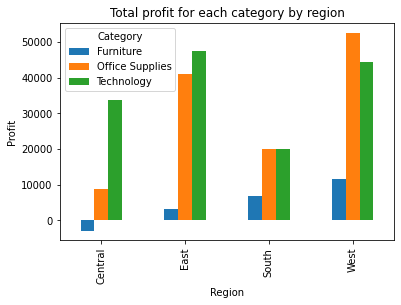

In [20]:
# TODO 10 - plot at least 2 plots, any plot you think interesting :)
#plot1 Category sales by region
df.groupby(['Region','Category'])['Profit'].agg('sum').reset_index()\
    .pivot(columns='Category', index='Region', values='Profit')\
    .plot(kind='bar',xlabel='Region',ylabel='Profit',title='Total profit for each category by region');

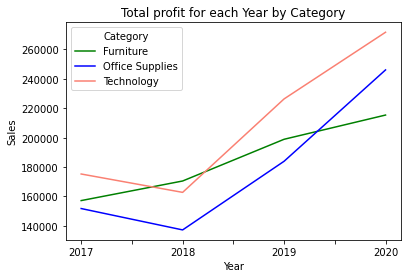

In [21]:
#plot2 Change of each category sales by year
df['Year'] = df['Order date'].dt.strftime('%Y')
df.groupby(['Year', 'Category'])['Sales'].agg('sum').reset_index()\
    .pivot(columns='Category', index='Year', values='Sales')\
    .plot(kind='line',xlabel='Year',ylabel='Sales',title='Total profit for each Year by Category', color=['green','blue','salmon']);

In [201]:
# TODO Bonus - use np.where() to create new column in dataframe to help you answer your own questions
# Which state has the most profit? top 5
df['new_col'] = np.where((df['Profit']> 0) & (df['State']> 'Kentucky'), True, False)
df.query("new_col == True")

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Order date,Ship date,Year,new_col
12,13,CA-2020-114412,2020-04-15,2020-04-20,Standard Class,AA-10480,Andrew Allen,Consumer,United States,Concord,...,Paper,Xerox 1967,15.552,3,0.2,5.4432,2020-04-15,2020-04-20,2020,True
13,14,CA-2019-161389,2019-12-05,2019-12-10,Standard Class,IM-15070,Irene Maddox,Consumer,United States,Seattle,...,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.976,3,0.2,132.5922,2019-12-05,2019-12-10,2019,True
16,17,CA-2017-105893,2017-11-11,2017-11-18,Standard Class,PK-19075,Pete Kriz,Consumer,United States,Madison,...,Storage,"Stur-D-Stor Shelving, Vertical 5-Shelf: 72""H x...",665.880,6,0.0,13.3176,2017-11-11,2017-11-18,2017,True
17,18,CA-2017-167164,2017-05-13,2017-05-15,Second Class,AG-10270,Alejandro Grove,Consumer,United States,West Jordan,...,Storage,Fellowes Super Stor/Drawer,55.500,2,0.0,9.9900,2017-05-13,2017-05-15,2017,True
21,22,CA-2019-137330,2019-12-09,2019-12-13,Standard Class,KB-16585,Ken Black,Corporate,United States,Fremont,...,Art,Newell 318,19.460,7,0.0,5.0596,2019-12-09,2019-12-13,2019,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,9982,CA-2020-163566,2020-08-03,2020-08-06,First Class,TB-21055,Ted Butterfield,Consumer,United States,Fairfield,...,Labels,Avery 476,16.520,5,0.2,5.3690,2020-08-03,2020-08-06,2020,True
9982,9983,US-2019-157728,2019-09-22,2019-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,...,Paper,"RSVP Cards & Envelopes, Blank White, 8-1/2"" X ...",35.560,7,0.0,16.7132,2019-09-22,2019-09-28,2019,True
9983,9984,US-2019-157728,2019-09-22,2019-09-28,Standard Class,RC-19960,Ryan Crowe,Consumer,United States,Grand Rapids,...,Phones,Panasonic KX TS208W Corded phone,97.980,2,0.0,27.4344,2019-09-22,2019-09-28,2019,True
9984,9985,CA-2018-100251,2018-05-17,2018-05-23,Standard Class,DV-13465,Dianna Vittorini,Consumer,United States,Long Beach,...,Labels,Self-Adhesive Removable Labels,31.500,10,0.0,15.1200,2018-05-17,2018-05-23,2018,True
